# Day2 work（平井佐和）
* mushroomからMental Health in Tech Surveyに課題を変更してやり直し

## インポート

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## データ読み込み

In [2]:
org_data = pd.read_csv("../data/survey.csv")
print(org_data.columns)
display(org_data.head())
display(org_data.tail())

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


## データベースの説明文

* Timestamp
* Age
* Gender
* Country
* state：アメリカ合衆国に住んでいる場合、どの州または地域に住んでいますか？
* self_employed：自営業ですか？
* family_history：精神病の家族歴はありますか？
* treatment：あなたはメンタルヘルスの治療を受けたことがありますか？
* work_interfere：精神的健康の状態は、あなたの仕事に影響すると感じますか？
* no_employees：あなたの会社や組織には何人の従業員がいますか？
* remote_work：勤務時間の少なくとも50％をオフィスの外で働いていますか？
* tech_company：テクノロジー系の企業または組織ですか？
* benefits：あなたの雇用主は精神的健康の利益（福利厚生？）を提供していますか？
* care_options：あなたの雇用主が提供するメンタルヘルスケアのオプションを知っていますか？
* wellness_program：あなたの雇用主は従業員のウェルネスプログラムの一環としてメンタルヘルスについて議論しましたか？
* seek_help：あなたの雇用主は、メンタルヘルスの問題と、助けを求める方法についての詳細を学ぶためのリソースを提供していますか？
* anonymity：あなたが精神的健康または薬物乱用の治療を利用することを選択した場合、あなたの匿名性は保護されていますか？
* leave：あなたが精神的健康のために休暇を取ることは容易ですか？
* mental_health_consequence：あなたの雇用主と精神的な健康の問題について話し合うことは悪影響をもたらすと思いますか？
* phys_health_consequence：あなたの雇用主と身体的な健康の問題について話し合うことは悪影響をもたらすと思いますか？
* coworkers：あなたは同僚と精神的な健康の問題について話し合うことはできますか？
* supervisor：あなたは直属の上司と精神的な健康の問題について話し合うことはできますか？
* mental_health_interview：面接で潜在的な雇用主との精神衛生問題を提起しますか？
* phys_health_interview：面接で潜在的な雇用主との身体的健康問題を提起しますか？
* mental_vs_physical：あなたの雇用主は精神的健康を肉体的健康と同じくらい重視していると感じますか？
* obs_consequence：あなたの職場で精神疾患の同僚に対する悪い結果を聞いたり、見たりしたことはありますか？（翻訳自信ない）
* comments：追加のメモやコメント

## 目的変数

* 精神病かどうかを判断したい
* treatment（治療を受けたかどうか）を目的変数とする

## 基礎集計

### ＜各データの要素名と出現頻度の確認＞

In [3]:
labels = org_data.columns

for label in labels:
    if "comments" in label:
        continue
    display(org_data[label].value_counts(sort=False))

2014-08-29 00:47:09    1
2014-08-28 07:03:00    1
2014-11-06 11:24:38    1
2014-08-27 15:05:00    1
2014-08-27 13:31:35    1
2014-10-05 21:16:10    1
2015-09-12 11:17:21    1
2014-08-28 19:26:03    1
2014-08-29 12:54:31    1
2014-08-28 17:01:21    1
2014-08-28 01:14:11    1
2014-08-27 17:41:44    1
2014-08-27 14:54:56    1
2014-08-27 11:29:37    1
2014-08-28 17:02:29    1
2014-08-29 08:54:23    1
2014-08-27 12:51:51    1
2014-08-29 11:34:07    1
2014-08-29 16:17:32    1
2014-08-27 13:55:38    1
2014-08-28 18:17:41    1
2014-08-28 10:02:45    1
2014-08-27 14:18:44    1
2015-02-21 09:29:20    1
2014-08-27 15:24:49    1
2015-02-21 09:33:29    1
2014-08-27 11:52:07    1
2014-08-29 09:19:25    1
2014-08-27 14:03:16    1
2014-08-28 22:22:39    1
                      ..
2014-08-27 14:28:43    1
2014-08-27 13:35:40    1
2014-08-29 11:04:19    1
2014-08-27 11:32:43    1
2014-08-27 19:17:07    1
2014-08-29 09:01:01    1
2014-08-27 17:03:02    1
2014-08-30 20:19:37    1
2014-08-27 20:55:48    1


-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1726            1
 99999999999

queer/she/they                                      1
p                                                   1
cis male                                            1
msle                                                1
Woman                                               3
Male                                              615
F                                                  38
ostensibly male, unsure what that really means      1
Cis Male                                            2
cis-female/femme                                    1
fluid                                               1
M                                                 116
Guy (-ish) ^_^                                      1
male                                              206
Malr                                                1
Man                                                 2
Femake                                              1
Trans-female                                        1
Male (CIS)                  

Nigeria                     1
Ireland                    27
China                       1
Croatia                     2
Colombia                    2
Hungary                     1
Singapore                   4
Zimbabwe                    1
Japan                       1
United Kingdom            185
Brazil                      6
Romania                     1
United States             751
New Zealand                 8
Switzerland                 7
Poland                      7
Australia                  21
Georgia                     1
Moldova                     1
Russia                      3
France                     13
Germany                    45
Sweden                      7
Latvia                      1
Italy                       7
Uruguay                     1
Canada                     72
Norway                      1
Finland                     3
Greece                      2
Thailand                    1
South Africa                6
Mexico                      3
Belgium   

MO     12
MD      8
NV      3
IL     29
MA     20
RI      1
WA     70
WI     12
NM      2
AZ      7
SC      5
DC      4
VT      3
UT     11
IN     27
VA     14
CT      4
TN     45
GA     12
KY      5
NH      3
SD      3
ID      1
AL      8
WY      2
NJ      6
CO      9
NY     57
NC     14
OH     30
MS      1
LA      1
IA      4
ME      1
WV      1
NE      2
CA    138
OR     29
MN     21
PA     29
OK      6
MI     22
FL     15
KS      3
TX     44
Name: state, dtype: int64

Yes     146
No     1095
Name: self_employed, dtype: int64

Yes    492
No     767
Name: family_history, dtype: int64

Yes    637
No     622
Name: treatment, dtype: int64

Never        213
Rarely       173
Sometimes    465
Often        144
Name: work_interfere, dtype: int64

26-100            289
6-25              290
500-1000           60
100-500           176
1-5               162
More than 1000    282
Name: no_employees, dtype: int64

Yes    376
No     883
Name: remote_work, dtype: int64

Yes    1031
No      228
Name: tech_company, dtype: int64

Don't know    408
Yes           477
No            374
Name: benefits, dtype: int64

Yes         444
Not sure    314
No          501
Name: care_options, dtype: int64

Don't know    188
Yes           229
No            842
Name: wellness_program, dtype: int64

Don't know    363
Yes           250
No            646
Name: seek_help, dtype: int64

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

Don't know            563
Somewhat difficult    126
Somewhat easy         266
Very difficult         98
Very easy             206
Name: leave, dtype: int64

Yes      292
No       490
Maybe    477
Name: mental_health_consequence, dtype: int64

Yes       61
No       925
Maybe    273
Name: phys_health_consequence, dtype: int64

Yes             225
No              260
Some of them    774
Name: coworkers, dtype: int64

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

Yes        44
No       1008
Maybe     207
Name: mental_health_interview, dtype: int64

Yes      202
No       500
Maybe    557
Name: phys_health_interview, dtype: int64

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

Yes     184
No     1075
Name: obs_consequence, dtype: int64

#### 【コメント】
* Timestampは除外しても良さそう（時刻情報の必要性がない）
* 年齢は0〜99以外の範囲は外れ値として扱う
* 性別の表記がバラバラなので名寄せが必要
* カテゴリカル変数が多いので、ダミー変数への変換が必要

### ＜欠損の確認＞

In [4]:
org_data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

#### 【コメント】
* stateの欠損・異常は４パターン考えられる
 1. Countryがアメリカ＆stateが存在　・・・・・　正常
 2. Countryがアメリカ＆stateが欠損　・・・・・　欠損
 3. Countryがアメリカ以外＆stateが存在　・・・　異常
 4. Countryがアメリカ以外＆stateが欠損　・・・　正常
* self_employedの欠損は数が少ないので多い方（No）に合わせる
* work_interfereの欠損は多いので新たに「unknown」として追加する

### ＜stateの確認＞

In [5]:
# Countryとstateのクロス集計から異常値（アメリカ以外でstateが入力されているデータ）を確認
display(pd.crosstab(index=org_data["state"], columns=org_data["Country"]))

# Countryがアメリカでstateが欠損している値を確認
org_data[(org_data["Country"]=="United States")&(org_data["state"].isnull())]

Country,"Bahamas, The",Bulgaria,Israel,Latvia,United States
state,,,,,
AL,0,0,0,0,8
AZ,0,0,0,0,7
CA,0,0,0,0,138
CO,0,0,0,0,9
CT,0,0,0,0,4
DC,0,0,0,0,4
FL,0,0,0,0,15
GA,0,0,0,0,12
IA,0,0,0,0,4


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
52,2014-08-27 11:45:33,31,M,United States,NaN,No,No,No,NaN,100-500,...,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
294,2014-08-27 14:15:57,56,Male,United States,NaN,No,No,Yes,Never,More than 1000,...,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,NaN
367,2014-08-27 15:13:33,36,Male,United States,NaN,No,Yes,Yes,Often,100-500,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
525,2014-08-27 17:32:04,41,Female,United States,NaN,No,Yes,Yes,Rarely,500-1000,...,Very easy,Maybe,Maybe,Some of them,Some of them,No,No,Yes,No,NaN
574,2014-08-27 20:52:20,50,Male,United States,NaN,No,No,No,Never,26-100,...,Don't know,No,No,No,No,No,Maybe,No,No,NaN
596,2014-08-27 22:14:23,24,Female,United States,NaN,No,Yes,Yes,Sometimes,100-500,...,Somewhat difficult,Yes,Maybe,No,No,No,No,No,Yes,NaN
638,2014-08-28 03:13:10,35,Male,United States,NaN,Yes,No,No,NaN,1-5,...,Very easy,No,No,Some of them,Yes,No,No,Yes,No,NaN
817,2014-08-28 14:41:47,44,male,United States,NaN,Yes,Yes,Yes,Sometimes,1-5,...,Very easy,Yes,Yes,Some of them,No,No,No,Yes,No,NaN
854,2014-08-28 17:01:06,31,Male,United States,NaN,No,Yes,No,NaN,6-25,...,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,NaN
926,2014-08-28 21:27:19,43,M,United States,NaN,No,Yes,No,Sometimes,500-1000,...,Don't know,Maybe,No,No,Some of them,No,Maybe,No,No,My employer gives access to basic counseling a...


#### 【コメント】
* Countryがアメリカ以外でstateに値が入っているデータは異常値として削除する（４データ）
* Countryがアメリカでstateに値が入っていないデータも数が少ないので削除する（１１データ）

## 前処理＆特徴量エンジニアリング

### ＜異常値と欠損値の削除＞
* 年齢は0〜99以外の範囲は外れ値として扱う
* Countryがアメリカ以外でstateに値が入っているデータを削除
* Countryがアメリカでstateに値が入っていないデータを削除

In [6]:
# Ageが0~99の範囲以外のデータを排除
mh_data = org_data[(0<=org_data["Age"])&(org_data["Age"]<=99)]

# Countryがアメリカ以外かつstateが存在するものを排除
mh_data = mh_data[(mh_data["Country"]=="United States")|(mh_data["state"].isnull())]

# Countryがアメリカかつstateが存在しないものを排除
mh_data = mh_data[(mh_data["Country"]!="United States")|(mh_data["state"].dropna())]

display(mh_data)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


### ＜欠損値の補完＞
* self_employedの欠損は数が少ないので多い方（No）に合わせる
* work_interfereの欠損は多いので新たに「Unknown」として追加する
* stateのNaNもNoStateに変えておく

In [7]:
# self_employedの欠損をNoに置換
# work_interfereの欠損をUnknownに置換
# stateのNaNをNoStateに変更
mh_data = mh_data.fillna({"self_employed":"No", "work_interfere":"UnKnown", "state":"NoState"})
mh_data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1080
dtype: int64

### ＜名寄せ＞
* Genderの項目名を適切に統合したい
* Male、Female、Otherの３種類

In [8]:
mh_data["Gender2"] = mh_data["Gender"].map({'Cis Male':'Male','Cis Man':'Male','M':'Male','Mail':'Male','Make':'Male',
                                            'Mal':'Male','Male':'Male','Male ':'Male','Male (CIS)':'Male','Malr':'Male',
                                            'Man':'Male','cis male':'Male','m':'Male','maile':'Male','male':'Male','msle':'Male',
                                            'Cis Female':'Female','F':'Female','Femake':'Female','Female':'Female',
                                            'Female ':'Female','Female (cis)':'Female','Woman':'Female','cis-female/femme':'Female',
                                            'f':'Female','femail':'Female','female':'Female','woman':'Female',
                                            'Agender':'Other','Androgyne':'Other','Enby':'Other','Female (trans)':'Other',
                                            'Genderqueer':'Other','Guy (-ish) ^_^':'Other','Male-ish':'Other','Nah':'Other',
                                            'Neuter':'Other','Trans woman':'Other','Trans-female':'Other','fluid':'Other',
                                            'male leaning androgynous':'Other','non-binary':'Other','queer':'Other','queer/she/they':'Other',
                                            'something kinda male?':'Other','ostensibly male, unsure what that really means':'Other'})

display(mh_data["Gender2"].value_counts())

Male      976
Female    244
Other      19
Name: Gender2, dtype: int64

### ＜今の時点で使用しない変数を削除＞
* Timestamp、Gender、commentsを削除

In [9]:
mh_data2 = mh_data.drop(["Timestamp", "Gender", "comments"],axis=1)
display(mh_data2)

,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender2
0,37,United States,IL,No,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,United States,IN,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Canada,NoState,No,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,United Kingdom,NoState,No,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,United States,TX,No,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male
5,33,United States,TN,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,Male
6,35,United States,MI,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,Female
7,39,Canada,NoState,No,No,No,Never,1-5,Yes,Yes,...,Don't know,No,No,No,No,No,No,No,No,Male
8,42,United States,IL,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,Female
9,23,Canada,NoState,No,No,No,Never,26-100,No,Yes,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Male


### ＜カテゴリカル変数の処理＞

* ダミー変数へ変換したいが、その前に
* Countryとstateは一緒に考える方が良さそうなので、１つの変数に直す（例：カナダ、アメリカCA、イギリス、アメリカTN・・・）

In [10]:
# Countryとstateを結合して新しくCountry2を作成
mh_data2["Country2"] = mh_data2["Country"] + '_' + mh_data2["state"]

# United States以外は州の表記はいらないので削除
mh_data2["Country2"] = mh_data2["Country2"].str.replace("_NoState", "")
display(mh_data2["Country2"])

0       United States_IL
1       United States_IN
2                 Canada
3         United Kingdom
4       United States_TX
5       United States_TN
6       United States_MI
7                 Canada
8       United States_IL
9                 Canada
10      United States_OH
11              Bulgaria
12      United States_CA
13      United States_CT
14                Canada
15      United States_IL
16        United Kingdom
17      United States_TN
18      United States_MD
19                France
20      United States_NY
21      United States_NC
22      United States_MA
23      United States_IA
24      United States_CA
25      United States_TN
26      United States_TN
27      United States_CA
28      United States_OH
29        United Kingdom
              ...       
1229              Greece
1230      United Kingdom
1231      United Kingdom
1232      United Kingdom
1233      United Kingdom
1234      United Kingdom
1235              Canada
1236    United States_CA
1237             Ireland


* ダミー変数へ変換する
* Yes、Noの選択肢しかなければYes：1、No：0にする
* No、Maybe、Yesの順番で序列をつける

In [11]:
# treatを０、１に変換
en_data = pd.DataFrame(data=mh_data2["treatment"].replace("Yes", 1).replace("No", 0))

# ラベルを分ける  temp1:ダミー変数に変換 temp2:Yesを１、Noを０に変換
temp1 = ['Gender2', 'Country2', 'benefits', 'care_options',  'wellness_program', 'seek_help', 'anonymity',"mental_vs_physical"]
temp2 = ['self_employed', 'family_history', 'remote_work', 'tech_company', 'obs_consequence']
temp3 = ['mental_health_consequence', 'phys_health_consequence', 'mental_health_interview', 'phys_health_interview']
         
for label in mh_data2.columns:
    if label == "work_interfere":
        en_data = pd.concat([en_data, pd.DataFrame(data=mh_data2[label].replace("Often", 4).replace("Sometimes", 3)
                                                   .replace("UnKnown", 2).replace("Rarely", 1).replace("Never", 0))], axis=1)
    elif label == "no_employees":
        en_data = pd.concat([en_data, pd.DataFrame(data=mh_data2[label].replace("More than 1000", 5).replace("500-1000", 4)
                                                   .replace("100-500", 3).replace("26-100", 2)
                                                   .replace("6-25", 1).replace("1-5", 0))], axis=1)
    elif label == "leave":
        en_data = pd.concat([en_data, pd.DataFrame(data=mh_data2[label].replace("Very easy", 4).replace("Somewhat easy", 3).
                                                   replace("Don't know", 2).replace("Somewhat difficult", 1).
                                                   replace("Very difficult", 0))], axis=1)
    elif label == "coworkers":
        en_data = pd.concat([en_data, pd.DataFrame(data=mh_data2[label].replace("Yes", 2).replace("Some of them", 1).replace("No", 0))], axis=1)
    elif label == "supervisor":
        en_data = pd.concat([en_data, pd.DataFrame(data=mh_data2[label].replace("Yes", 2).replace("Some of them", 1).replace("No", 0))], axis=1)        
    elif label in temp1:
        dummy = pd.get_dummies(mh_data2[label], prefix=label)
        en_data = pd.concat([en_data, dummy], axis=1)
    elif label in temp2:
        en_data = pd.concat([en_data, pd.DataFrame(data=mh_data2[label].replace("Yes", 1).replace("No", 0))], axis=1)
    elif label in temp3:
        en_data = pd.concat([en_data, pd.DataFrame(data=mh_data2[label].replace("Yes", 2).replace("Maybe", 1).replace("No", 0))], axis=1)
        
        
        
        
en_data

,treatment,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits_Don't know,benefits_No,benefits_Yes,...,Country2_United States_TN,Country2_United States_TX,Country2_United States_UT,Country2_United States_VA,Country2_United States_VT,Country2_United States_WA,Country2_United States_WI,Country2_United States_WV,Country2_United States_WY,Country2_Uruguay
0,1,0,0,4,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,4,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0,0,1,3,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6,1,0,1,3,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,3,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## ロジスティック回帰
* DAY1の内容

[[-5.46387045e-02  1.40994134e+00  7.41426284e-01 -9.60677035e-02
   2.47853056e-01 -1.97753264e-01 -4.45344418e-01 -4.22335905e-01
   2.83668740e-01 -5.22010007e-01 -5.34599113e-01  4.72597537e-01
  -1.80305785e-01 -1.78404057e-02 -3.85865392e-01  1.64766318e-02
  -3.13591465e-01 -2.86896750e-01 -2.22396191e-01 -3.31183008e-01
  -3.04323844e-02 -1.48541089e-01  2.24612943e-01 -2.03141786e-01
   5.51385699e-01 -1.74517999e-01 -1.28476139e-01 -1.25337111e-02
  -1.18604259e-01 -2.46344947e-01 -2.19062378e-01  6.50006512e-01
  -4.11355302e-02 -5.62395155e-01  1.95191016e-02 -1.35962619e-02
  -5.08316932e-01 -6.06550803e-01  0.00000000e+00 -9.75172328e-02
   5.41066236e-01  6.53157899e-03 -4.48405240e-01 -6.33494627e-01
  -3.61160502e-01  1.97529414e-01  0.00000000e+00  2.55728840e-01
  -2.30486973e-01 -6.23431409e-01 -1.31050159e-01  1.35859591e-01
   0.00000000e+00  0.00000000e+00  3.44715554e-01  6.78704517e-01
  -6.22860086e-01 -1.30471990e-01  1.16335565e-01  3.66917764e-01
   1.63135

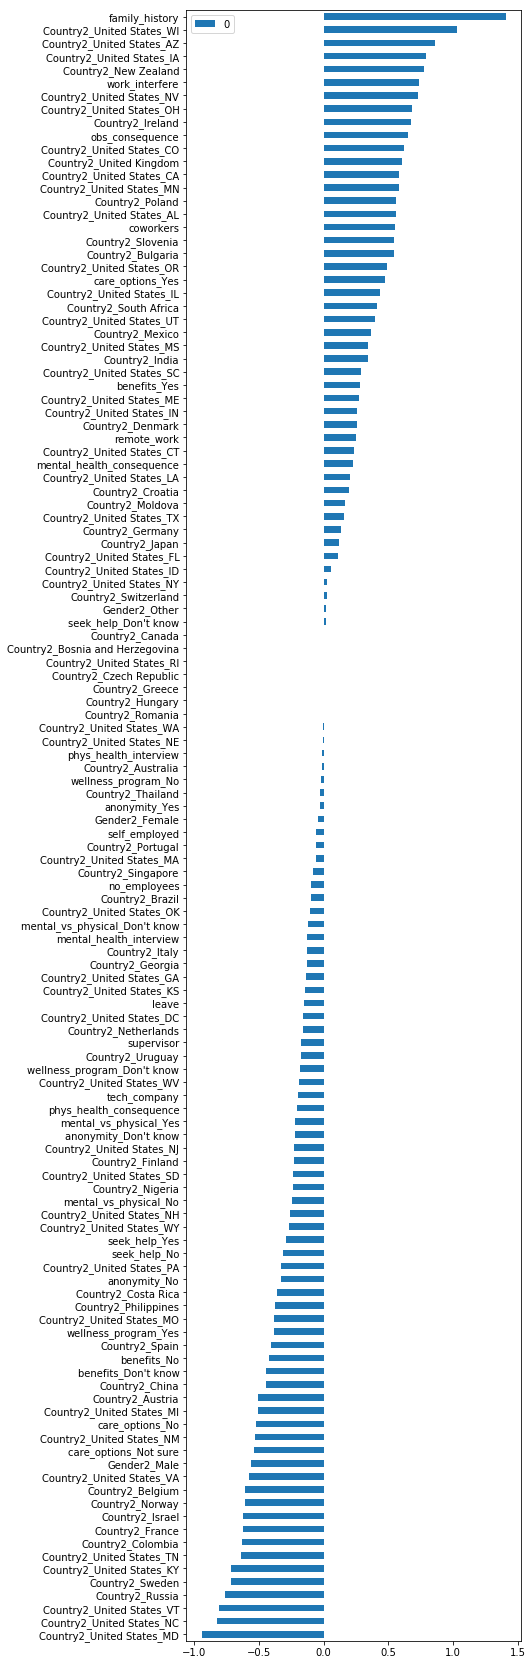

In [12]:
y = en_data["treatment"].values
x = en_data.drop(["treatment"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

# ロジスティック回帰
lr = LogisticRegression()
lr.fit(x_train, y_train)

# 結果表示
print(lr.coef_, lr.intercept_)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

coef_df = pd.DataFrame(lr.coef_[0], x.columns)
coef_df2 = coef_df.sort_values(by=0)
coef_df2
coef_df2.plot.barh(figsize=(6, 30))

【コメント】
* 精度は74%
* family_historyが最も影響している
* 次に特定の国や州の影響度が高い
* 仕事面では、精神状態が仕事に関わると感じているかどうかが影響している

## ランダムフォレスト

* パラメータを何度か試してみた勘で決めた場合
* n_estimators、max_depthを順番に大きくして精度が高いところ

score= 0.941473259334006
[7.88205442e-03 1.15489685e-01 2.79200827e-01 3.97705235e-02
 1.48929226e-02 8.33043481e-03 1.86998938e-02 1.15878793e-02
 2.16890224e-02 1.95903530e-02 1.41159297e-02 4.39856771e-02
 7.05433896e-03 1.15277501e-02 7.19828407e-03 1.10589460e-02
 1.19974630e-02 8.99182499e-03 1.14647007e-02 3.02359126e-03
 1.04982888e-02 3.75818378e-02 2.47260918e-02 1.56145659e-02
 2.62843399e-02 2.24956484e-02 1.32421693e-02 1.94714255e-02
 1.37231978e-02 1.37969997e-02 8.36441700e-03 1.84909594e-02
 1.55413362e-02 1.63130375e-02 1.69630514e-03 4.91637931e-04
 7.51523394e-05 0.00000000e+00 0.00000000e+00 9.06686837e-05
 6.42639233e-05 4.61224438e-03 0.00000000e+00 1.71544581e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.13031505e-05
 0.00000000e+00 1.09782112e-03 0.00000000e+00 3.21418729e-03
 0.00000000e+00 0.00000000e+00 4.49385597e-04 2.76248656e-03
 3.00338070e-04 1.30032198e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.36525966e-03 1.01044987e-04 0.00000000e+00

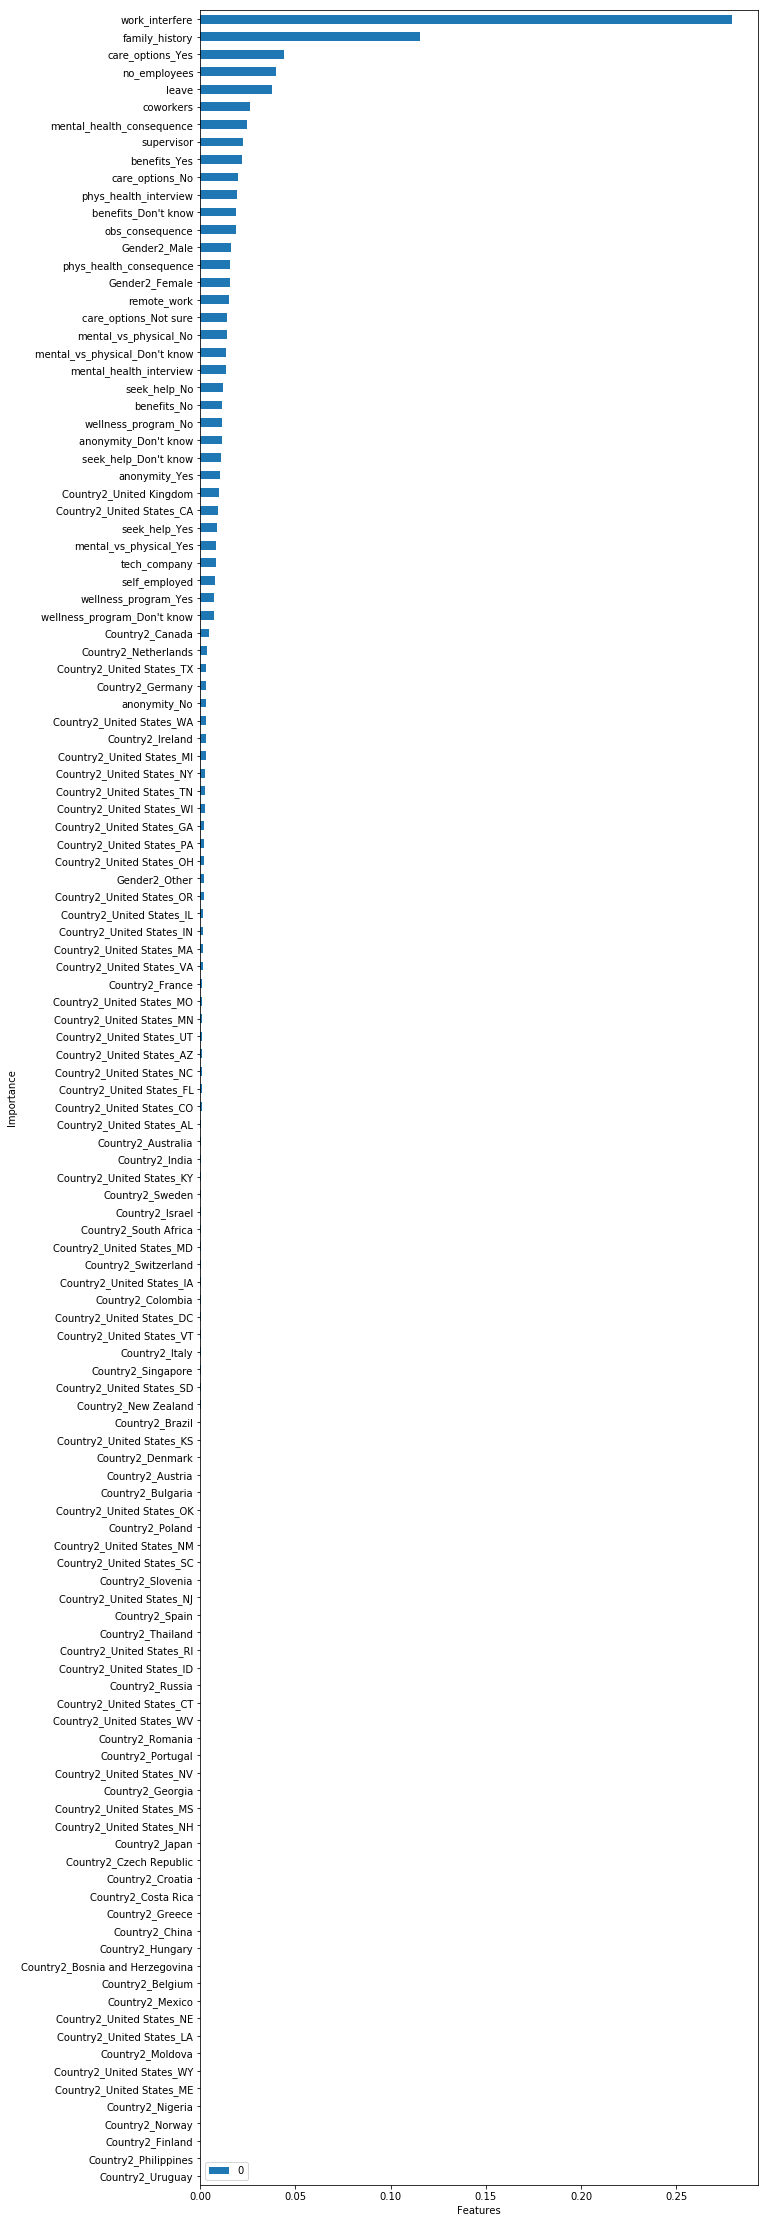

In [14]:
from sklearn.ensemble import RandomForestClassifier

y = en_data["treatment"].values
x = en_data.drop(["treatment"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

clf = RandomForestClassifier(n_estimators=70, max_depth=20, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=256)
clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# 説明変数の重要度を出力
print(clf.feature_importances_)
plot_data = pd.DataFrame(clf.feature_importances_, index=en_data.columns.drop("treatment")).sort_values(by=0)
plot_data.plot.barh(figsize=(10,40))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

## ランダムフォレスト＆Cross Validation

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

y = en_data["treatment"].values
x = en_data.drop(["treatment"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

param_grid = {'n_estimators':[50, 60, 70, 80, 90, 100], 'max_depth':[15, 20, 25, 30]}
cv = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5)
cv.fit(x_train, y_train)

cv.best_params_

{'max_depth': 15, 'n_estimators': 70}

score= 0.9323915237134208
[9.68187486e-03 1.13815173e-01 2.74447051e-01 3.67713291e-02
 1.52656801e-02 9.43319454e-03 1.73329297e-02 1.16246279e-02
 1.96174903e-02 1.95882057e-02 1.49273377e-02 4.74352515e-02
 6.74782849e-03 1.09255276e-02 9.37417593e-03 1.03162553e-02
 1.14357868e-02 8.76852310e-03 1.14417774e-02 3.17832195e-03
 1.12015518e-02 3.90976738e-02 2.48822204e-02 1.48920582e-02
 2.56695329e-02 2.11140849e-02 1.19564037e-02 2.16291981e-02
 1.29911086e-02 1.16943894e-02 1.00466585e-02 1.81279271e-02
 1.65725588e-02 1.82703563e-02 2.34785745e-03 1.17931623e-03
 4.95819701e-05 0.00000000e+00 0.00000000e+00 3.94607425e-04
 5.26162531e-05 4.89747112e-03 0.00000000e+00 1.65231746e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.58621226e-04
 0.00000000e+00 1.09884020e-03 0.00000000e+00 3.10349522e-03
 0.00000000e+00 0.00000000e+00 4.31087119e-04 3.11708577e-03
 5.12058784e-04 2.19599009e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.55229482e-03 1.07247631e-04 0.00000000e+0

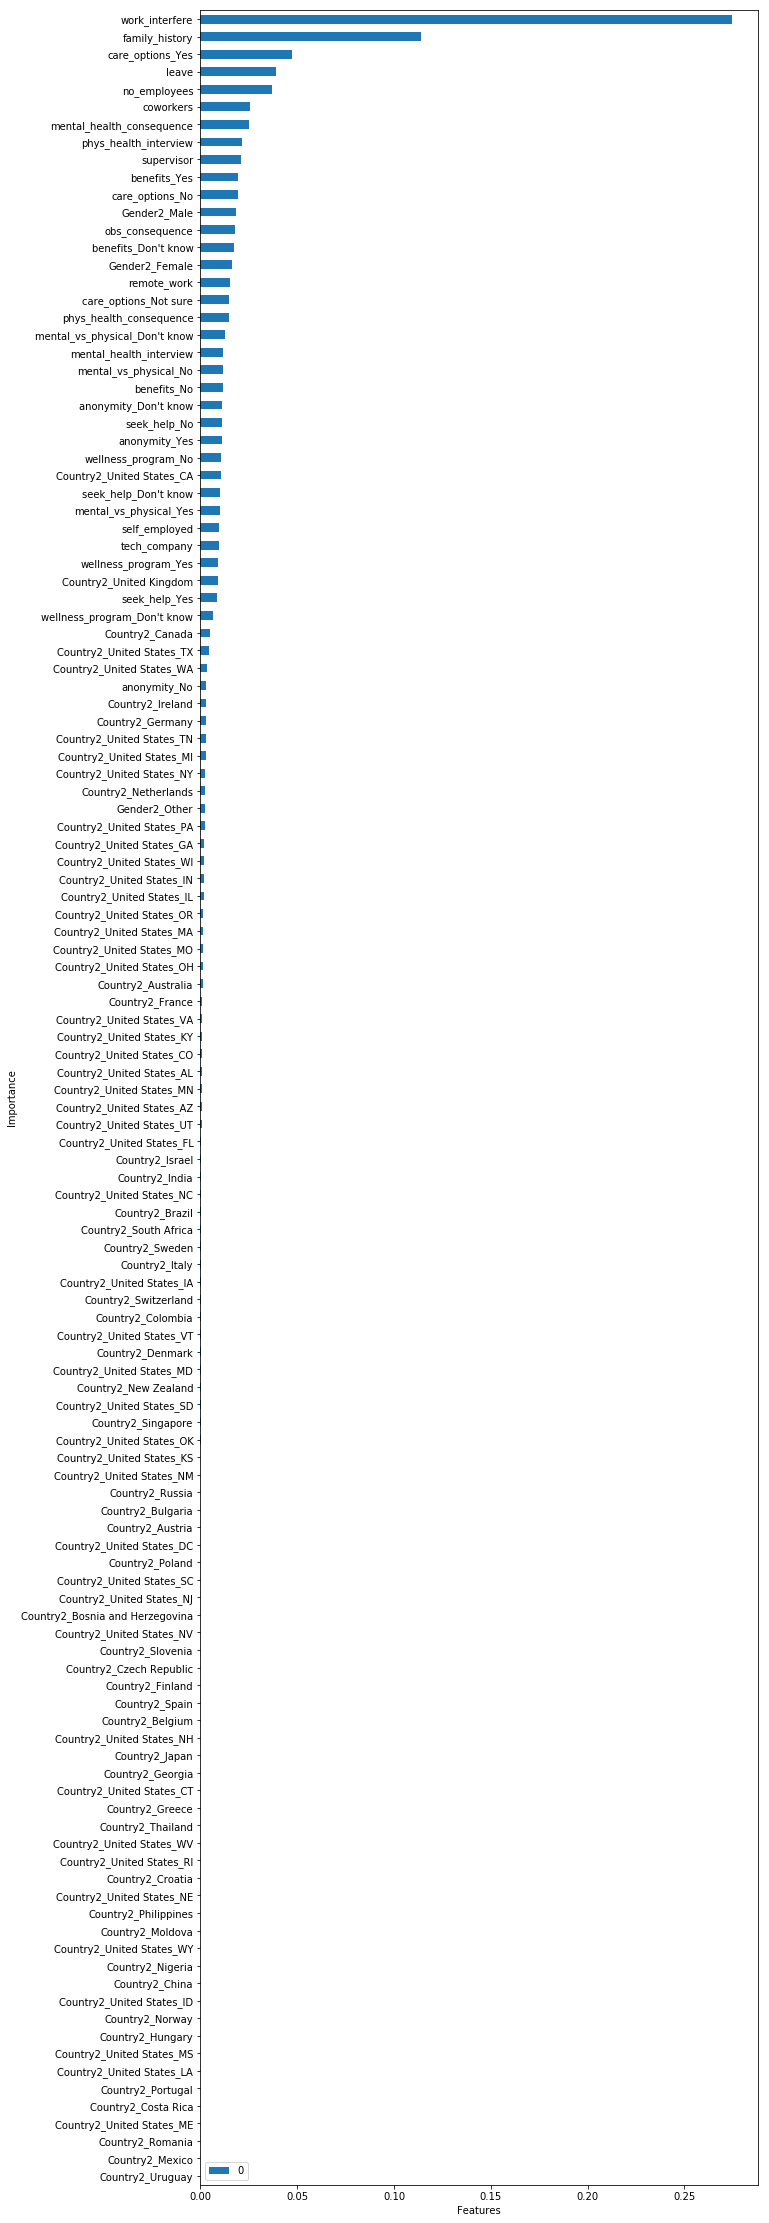

In [34]:
cv.best_params_["n_estimators"]

clf = RandomForestClassifier(n_estimators=cv.best_params_["n_estimators"], max_depth=cv.best_params_["max_depth"], criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=256)
clf.fit(x_train, y_train)
print("score=", clf.score(x_train, y_train))

# 説明変数の重要度を出力
print(clf.feature_importances_)
plot_data = pd.DataFrame(clf.feature_importances_, index=en_data.columns.drop("treatment")).sort_values(by=0)
plot_data.plot.barh(figsize=(10,40))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

【コメント】
* CrossValidationを使用しないランダムフォレスト：score= 0.941473259334006
* CrossValidationを使用したランダムフォレスト：score= 0.9394550958627649

* ロジスティック回帰と比較して、約20％精度が向上した。
* なぜか使用しなかった方が良いという結果になってしまった（CVの使用方法が間違っている？下がる場合もある？）
* ※原因の特定が間に合わなかったため、次回講義までに調査・考察を行う。
## 　
* ロジスティック回帰の重みを見ると国や州が大きく関与していたが、ランダムフォレストは国の重要度は低く、以下の項目が高い結果となった。
 1. work_interfere：精神的健康の状態は、あなたの仕事に影響すると感じますか？
 2. family_history：精神病の家族歴はありますか？
 3. care_options：あなたの雇用主が提供するメンタルヘルスケアのオプションを知っていますか？
 4. leave：あなたが精神的健康のために休暇を取ることは容易ですか？
 5. no_employees：あなたの会社や組織には何人の従業員がいますか？